# 3.4.5 - K-Modes


* En este Notebook vamos a ver el Algoritmo del ***K-Modes***, que es un ***Algoritmo de Aprendizaje no Supervisado para Clustering*** aplicado a elementos compuestos por variables categoricas. Vamos a ***resolver un problema de Clusterización usando*** la implementación de este Algoritmo de Aprendizaje con la ***librería kmodes***.


* Vamos a tratar los siguientes puntos:
<span></span><br>
    1. [K-Modes](#M1)
<span></span><br>
    2. [Pseudocódigo del K-Modes](#M2)
<span></span><br>
    3. [Ejemplo Clustering con variables categóricas: Campañas de Marketing Bancario](#M3)
    <span></span><br>
    3.1. [Carga de datos](#M31)
    <span></span><br>
        3.2. [Selección y Transformación de las variables categóricas a números](#M32)
    <span></span><br>
        3.3. [Visualización de los datos](#M33)
    <span></span><br>
        3.4. [Selección del Número óptimo de Cluster](#M34)
    <span></span><br>
        3.5. [Creacción del modelo y ajuste](#M35)
    <span></span><br>
        3.6. [Obtención del modelo (hipótesis)](#M36)
    <span></span><br>
        3.7. [Conclusiones: Interpretación de los resultados](#M37)



<hr>


## <a name="M1">1. K-Modes</a>


* ***K-Modes es un Algoritmo de Aprendizaje para resolver problemas de Clustering que se aplica en los casos en los que se tengan unicamente variable categóricas (nominales u ordinales) en el Dataset***.


* ***El funcionamiento del K-Modes es muy similar al K-Means*** pero en vez de ***calcular las similaridades entre el centroide y los elementos*** con la distancia euclidea, lo calcula ***con una métrica de similaridad definida por el número de variables coincidentes entre el elemento y el centroide del Cluster***.


* La ***métrica se similaridad utilizada en el K-Modes es la siguiente***:


<span style="font-size:20px">$$d(X,Y) =  \sum_{j=1}^{m}\delta (x_j, y_j)$$</span>
<span></span><br>
<span style="font-size:16px">$$donde$$</span>
<span></span><br>
<span style="font-size:16px">$$\delta (x_j, y_j) = \left\{\begin{matrix} 1  \:  (x_j=y_j)\\ 0 \: (x_j\neq y_j) \end{matrix}\right.$$</span>


* El objetivo del K-Modes es minimizar una función similar a la inercia del K-Means de la siguiente forma:

<span style="font-size:16px">$$D(S,Q) =  \sum_{i=1}^{n}d(X_i, Q)$$</span>

* Donde
<span></span><br><br>
    + $S$ es un conjunto de elementos $S=\{X_1,X_2,...,X_n\}$ descritos por $'m'$ variables categoricas $V_1, V2_, ...,V_m$
<span></span><br><br>
    + $Q$ es la moda de las variables del conjunto de elementos $S$ y tiene la siguiente forma $Q=\{q_1,q_2,...,q_m\}$


* Por tanto el objetivo del K-Modes es elegir $'K'$ centroides que reduzcan al minimo la función antes descrita:


<span style="font-size:20px">$$\underset{K}{argmin} \sum_{i=1}^{k}\sum_{X \in  S_i} d(X, Q_i)$$</span>

<hr>

## <a name="M2">2. Pseudocódigo del K-Modes</a>


* El algoritmo del K-Modes funciona de la siguiente manera:

    1. ***Inicialización***: Elige un centroide para cada uno de los ‘k’ Cluster. Lo puede elegir bien de forma aleatoria, eligiendo ‘k’ puntos del dataset al azar, etc.
<span></span><br><br>
    2. ***Loop***: Asignación-Actualización hasta converger:
<span></span><br><br>
        * ***Asignación***: Se asigna a cada elemento del dataset el Cluster más cercano dada la siguiente métrica de similaridad
<span></span><br><br>
        <span style="font-size:20px">$$d(X,Y) =  \sum_{j=1}^{m}\delta (x_j, y_j)$$</span>
<span></span><br><br>
        * ***Actualización***: Calcular los nuevos centroides con la moda de cada variable.



## <a name="M3">4. Ejemplo Clustering con variables categóricas: Campañas de Marketing Bancario</a>


* En este punto vamos a resolver un problema de ***Clusterización usando la librería de kmodes***, que consistirá en ***perfilar a los clientes*** de un banco en función de una serie de variables categóricas obtenidas de una campaña de Marketing.


* El Dataset se ha obtenido del siguiente enlace:<br>
UCI Repository: https://archive.ics.uci.edu/ml/datasets/bank+marketing


* La documentación sobre la librería de kmodes se encuentra en el siguiente enlace:<br>
https://pypi.org/project/kmodes/


* Para resolver este problema tenemos una serie de variables que describen a los clientes que son las siguientes:

    1. ***age***
    2. ***job***: Tipo de Trabajo
    3. ***marital***: Estado Civil
    4. ***education***: Nivel de estudios
    5. ***default***: Tiene concedido un credito (Si, No)
    6. ***housing***: Tiene un credito sobre la vivienda  (Si, No)
    7. ***loan***: Tiene un credito personal (Si, No)
    8. ***contact***: Via de contacto (categorical: 'cellular','telephone')
    9. ***month***: Mes del último contacto (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10. ***day_of_week***: Día de la semana del último contacto (categorical: 'mon','tue','wed','thu','fri')
    11. ***poutcome***: Resultado de la anterior campaña de marketing (categorical: 'failure','nonexistent','success')


* El objetivo de este problema es el de obtener conjuntos de clientes similares entre sí pero diferentes entre el resto de conjuntos utilizando las variables categóricas que les describen.


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    3.1. [Carga de datos](#M31)
<span></span><br>
    3.2. [Selección y Transformación de las variables categóricas a números](#M32)
<span></span><br>
    3.3. [Visualización de los datos](#M33)
<span></span><br>
    3.4. [Selección del Número óptimo de Cluster](#M34)
<span></span><br>
    3.5. [Creacción del modelo y ajuste](#M35)
<span></span><br>
    3.6. [Obtención del modelo (hipótesis)](#M36)
<span></span><br>
    3.7. [Conclusiones: Interpretación de los resultados](#M37)
    
    
* En primer lugar vamos a importar las librería necesarias:

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

from collections import defaultdict
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder

<hr>


### <a name="M31">3.1. Carga de datos</a>


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "../../data/bank.csv"

In [2]:
df = pd.read_csv("../../data/bank.csv")
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no



<hr>


### <a name="M32">3.2. Selección y Transformación de las variables categóricas a números</a>


* En primer lugar vamos a seleccionar las variables que pueden ser de nuestro interés que serán las siguientes:

    + age
    + job
    + marital
    + education
    + default
    + housing
    + loan
    + contact
   
   
* El resto de variables vamos a descartarla para este ejemplo, pero a modo de ejercicio se pueden incluir para ver como cambiarían los resultados obtenidos.

In [3]:
features = ['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact']
df_categorical = df[features]
df_categorical.head()

,age,job,marital,education,default,housing,loan,contact
0,30,unemployed,married,primary,no,no,no,cellular
1,33,services,married,secondary,no,yes,yes,cellular
2,35,management,single,tertiary,no,yes,no,cellular
3,30,management,married,tertiary,no,yes,yes,unknown
4,59,blue-collar,married,secondary,no,yes,no,unknown


* Dado que la variable edad es una variable de tipo numérica, debemos de discretizarla para poder usarla con el K-Modes.


* Crearemos una nueva variable llamada 'age_range', donde agruparemos las edades en rangos de edades.

In [4]:
df_categorical['age_range'] = pd.cut(df_categorical['age'], 
                                     [0, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                                     labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
df_categorical  = df_categorical.drop('age', axis = 1)
df_categorical.head()

,job,marital,education,default,housing,loan,contact,age_range
0,unemployed,married,primary,no,no,no,cellular,20-30
1,services,married,secondary,no,yes,yes,cellular,30-40
2,management,single,tertiary,no,yes,no,cellular,30-40
3,management,married,tertiary,no,yes,yes,unknown,20-30
4,blue-collar,married,secondary,no,yes,no,unknown,50-60


* Una vez que tenemos seleccionadas las variables a utilizar, vamos a pasar a codificar el valor de las variables a números.

In [5]:
encoder_dict = defaultdict(LabelEncoder)
df_encode = df_categorical.apply(lambda x: encoder_dict[x.name].fit_transform(x))
df_encode.sample(5)

,job,marital,education,default,housing,loan,contact,age_range
158,6,2,1,0,0,0,0,1
3394,7,1,1,0,0,0,0,3
2423,2,2,1,0,0,0,2,2
3364,6,0,1,0,0,1,2,2
2619,7,1,1,0,0,0,0,3


<hr>


### <a name="M33">3.3. Visualización de los datos</a>


* Pasamos a visualizar la relación entre variables:

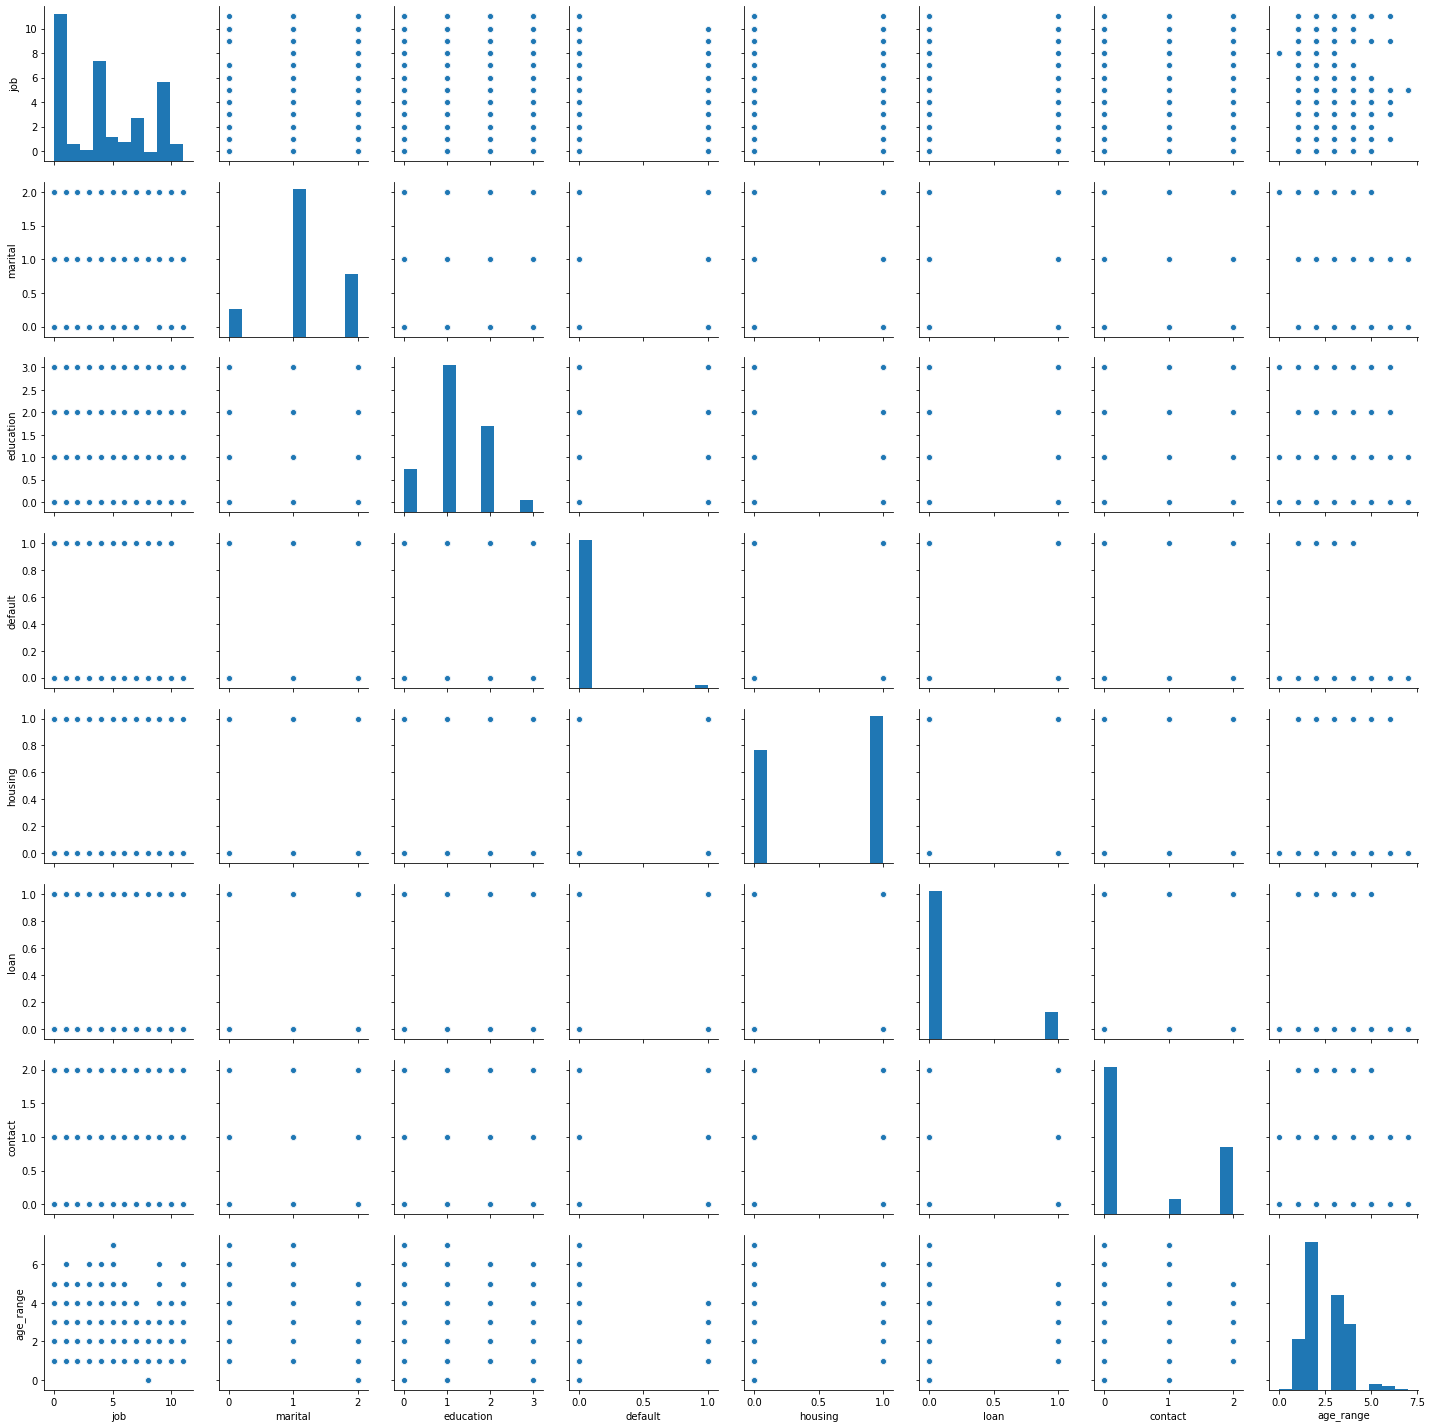

In [6]:
import seaborn as sns
sns.pairplot(df_encode, palette="husl")

<hr>


### <a name="M34">3.4. Selección del Número óptimo de Cluster</a>


* Para seleccionar el número óptimo de Clusters vamos a utilizar al igual que con el K-Means la técnica del codo.


* Para ello una vez obtenidos los valores de la función de perdida tras aplicar el K-Modes de 1 a N Clusters, ***representamos en una gráfica lineal los valores de la función de perdida respecto del número de Clusters***. 


* Con los resultados obtenidos podemos ver como se produce un cambio "brusco" de tendencia para 4 Clusters.

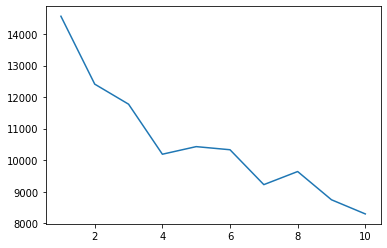

In [7]:
np.random.seed(0)
MAX_CLUSTERS = 10
cost = []
for num_clusters in range(1,MAX_CLUSTERS+1,1):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1)
    kmode.fit_predict(df_encode)
    cost.append(kmode.cost_)

plt.plot([i for i in range(1,MAX_CLUSTERS+1,1)],cost)

<hr>


### <a name="M35">3.5. Creacción del modelo y ajuste</a>


* Para crear el modelo vamos a seleccionar 4 Clusters.

In [8]:
km = KModes(n_clusters=4, init = "Huang", n_init = 1)
y_pred = km.fit_predict(df_encode)

<hr>


### <a name="M36">3.6. Obtención del modelo (hipótesis)</a>


* Para el K-Modes vamos a obtener como resultados los centroides de los Clusters que estaran representados por la moda del valor de cada una de las variables de los elementos del Cluster.


* A continuación obtenemos los centroides de los 4 Clusters.

In [9]:
df_centroids = pd.DataFrame(km.cluster_centroids_)
df_centroids.columns = df_encode.columns
df_centroids

,job,marital,education,default,housing,loan,contact,age_range
0,1,1,1,0,1,0,0,2
1,9,1,1,0,1,0,2,4
2,4,1,2,0,0,0,0,2
3,1,1,0,0,1,0,0,3


* Al haber codificado los valores de las variables, vamos a pasar de decodificar esos valores para poder entender los Clusters:

In [10]:
inverse_transform_lambda = lambda x: encoder_dict[x.name].inverse_transform(x)
df_centroids.apply(inverse_transform_lambda)

,job,marital,education,default,housing,loan,contact,age_range
0,blue-collar,married,secondary,no,yes,no,cellular,30-40
1,technician,married,secondary,no,yes,no,unknown,50-60
2,management,married,tertiary,no,no,no,cellular,30-40
3,blue-collar,married,primary,no,yes,no,cellular,40-50


<hr>


### <a name="M37">3.7. Conclusiones: Interpretación de los resultados</a>


* Como resultado hemos obtenido 4 Clusters donde se puede ver el perfil de los clientes del banco a los que lanzaron las campañas de marketing.


* Al obtener como centroides los valores categóricos mayoritarios de cada variable se puede perfilar viendo estos valores a cada Cluster.


* A continuación se muestra en una gráfica de barras la distribución de cada variable en función del cluster:

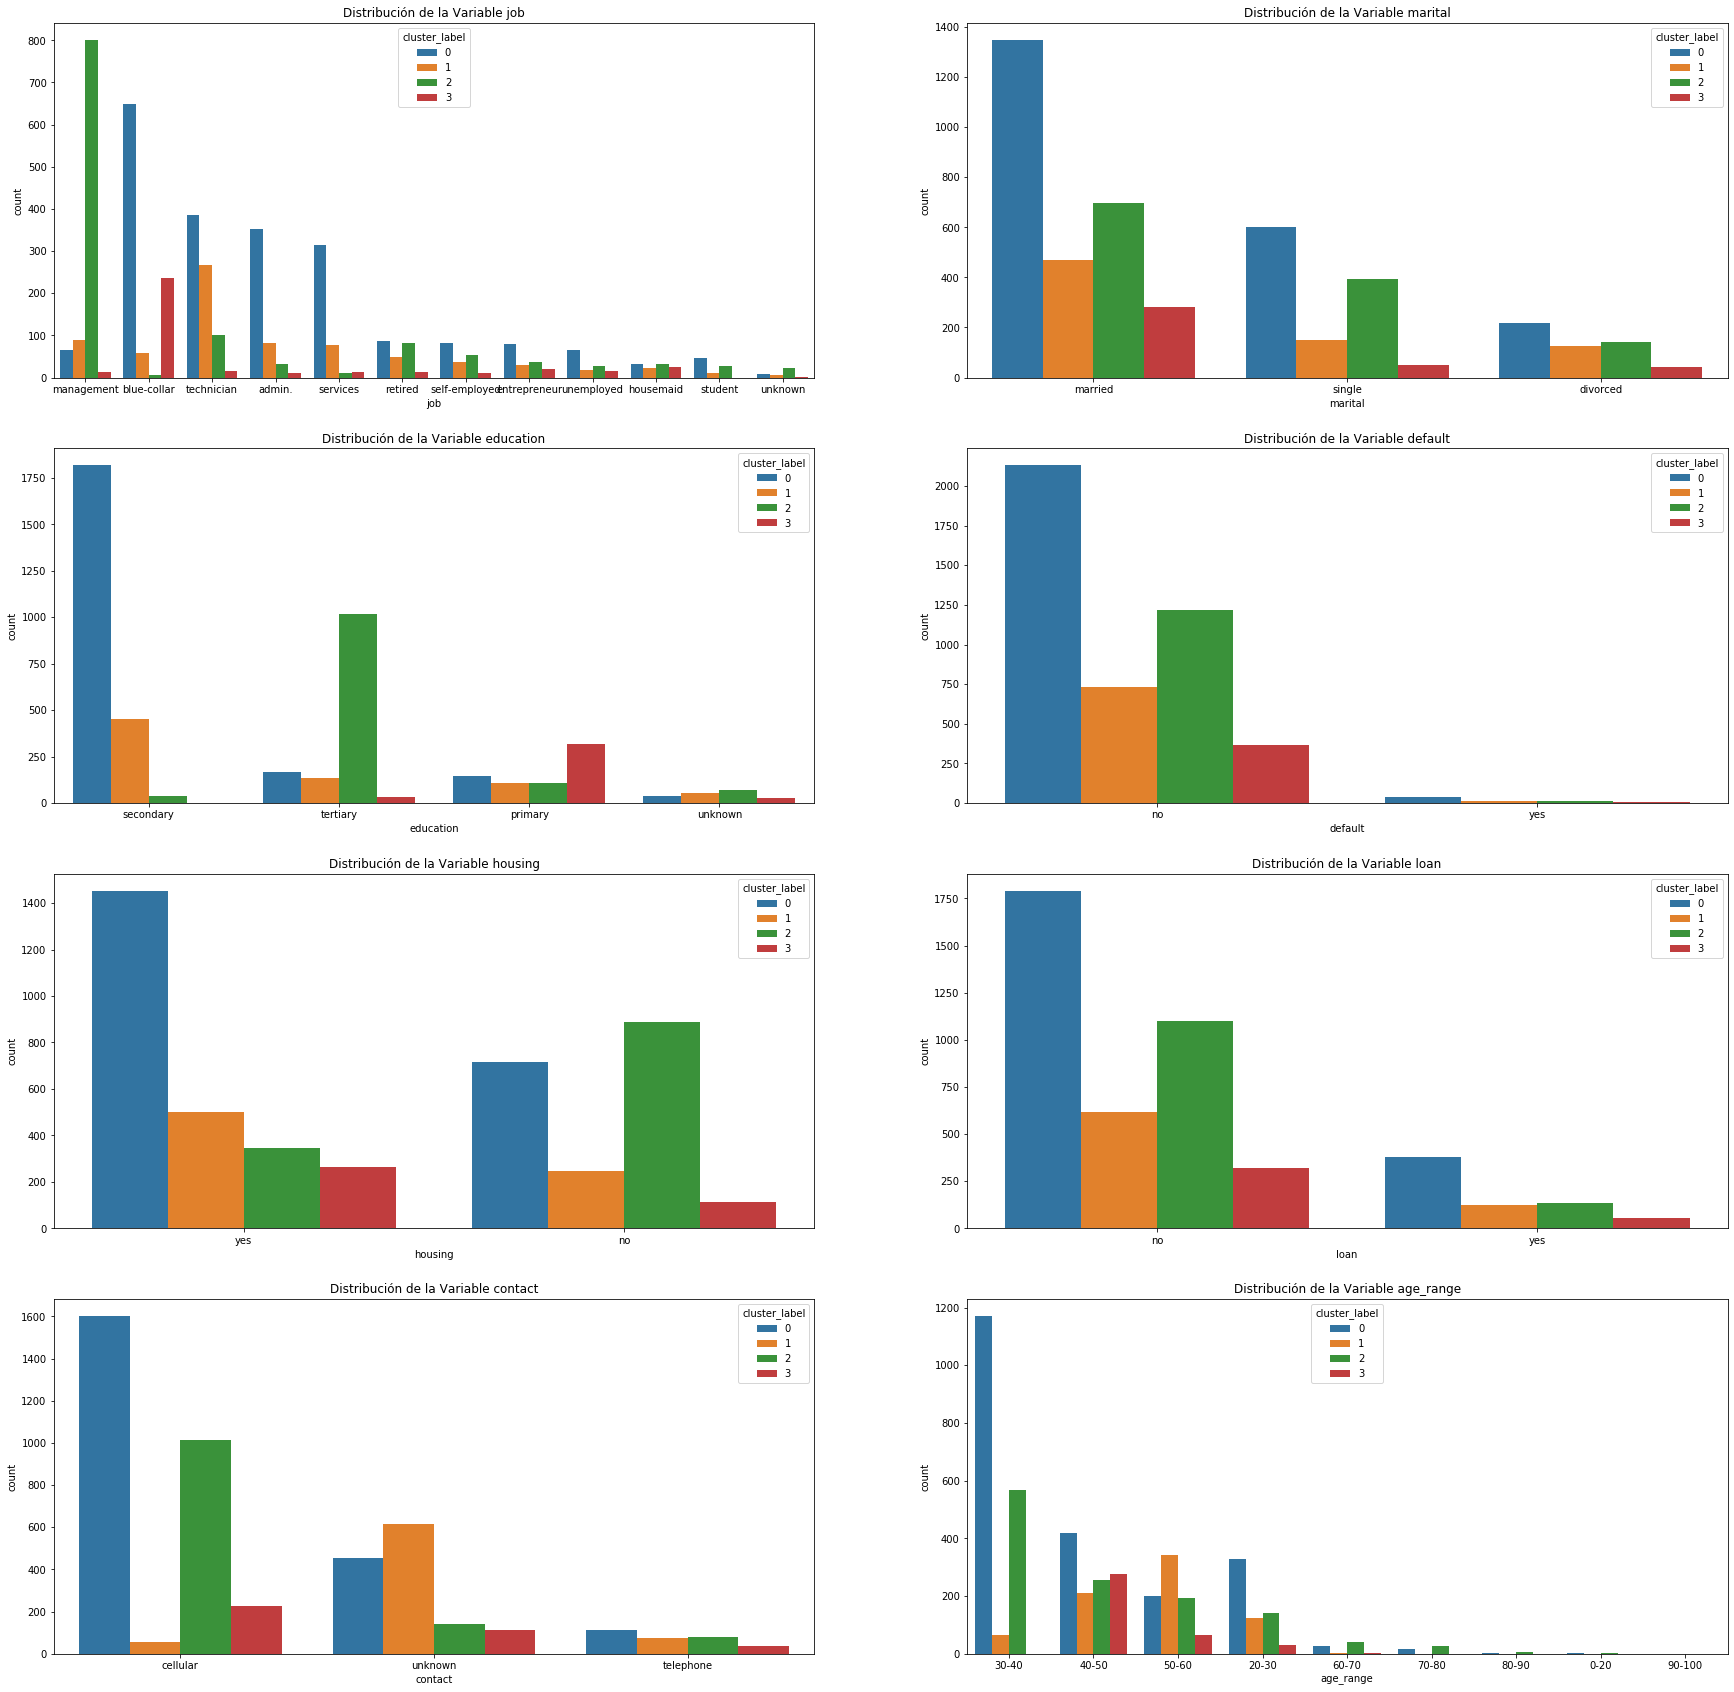

In [11]:
# Asignamos a cada elemento el Cluster al que pertenece
df_clusters = pd.DataFrame(y_pred)
df_clusters.columns = ['cluster_label']
df_result = pd.concat([df_categorical, df_clusters], axis = 1).reset_index()
df_result = df_result.drop(['index'], axis = 1)

# Pintamos en gráficos de barras las distribuciones de elementos por Variable y Cluster
plt.subplots(figsize = (30, 30))
for index, feature in enumerate(df_result.columns[:-1]):
    plt.subplot(4, 2, index+1)
    plt.title('Distribución de la Variable {}'.format(feature))
    sns.countplot(x=df_result[feature], order=df_result[feature].value_counts().index, hue=df_result['cluster_label'])
plt.show()

<hr>


Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.


<img src="../../imgs/CC_BY-NC-SA.png" alt="CC BY-NC">